In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

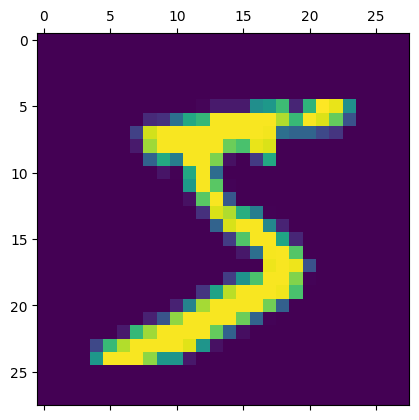

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

In [10]:
x_train_flat[0].shape

(784,)

In [11]:
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

In [12]:
x_train_flat.shape

(60000, 784)

In [13]:
import numpy as np

In [14]:
weights = np.random.rand(784,10)

In [15]:
weights.shape

(784, 10)

In [16]:
biases = np.random.rand(10)

In [17]:
weighted_sum = np.dot(x_train_flat,weights)

In [18]:
weighted_sum.shape

(60000, 10)

In [19]:
weighted_sum[0]

array([52.21114611, 58.70308023, 54.91260943, 54.22662345, 51.88418486,
       49.53866624, 57.32120704, 52.91197119, 51.63099553, 52.50481274])

In [20]:
temp = weighted_sum[0] + biases
temp

array([52.66586578, 59.20911719, 54.99802417, 54.55151533, 51.90880046,
       50.24326267, 57.33029945, 53.40160129, 52.22758065, 52.65358714])

In [21]:
weighted_sum_with_bias = weighted_sum + biases
weighted_sum_with_bias[0]

array([52.66586578, 59.20911719, 54.99802417, 54.55151533, 51.90880046,
       50.24326267, 57.33029945, 53.40160129, 52.22758065, 52.65358714])

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [23]:
sigmoid(12)

0.9999938558253978

In [24]:
type(weighted_sum_with_bias)

numpy.ndarray

In [25]:
converted = sigmoid(weighted_sum_with_bias)

In [26]:
converted[1100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
#Initializing weights with np.random.rand was a bad idea.
#We have to use 'Xavier (Glorot) initialization' which create ndarray having random values between -limit to limit
#where, limit = np.sqrt(6 / (input_dim + output_dim))

In [28]:
def xavier_init(input_dim, output_dim):
    limit = np.sqrt(6 / (input_dim + output_dim))
    return np.random.uniform(-limit, limit, (input_dim, output_dim))

In [29]:
weights2 = xavier_init(784,10)

In [30]:
weights2.shape

(784, 10)

In [31]:
weights2

array([[-0.08533527,  0.00657664, -0.06505747, ..., -0.03370108,
        -0.03854999,  0.02476039],
       [ 0.02978449, -0.05862207,  0.04036972, ..., -0.07027214,
         0.05792596, -0.06326071],
       [-0.03743314,  0.08238474, -0.01329539, ...,  0.05481328,
         0.00686236, -0.07477059],
       ...,
       [-0.04807568, -0.07311768,  0.00572454, ...,  0.06903432,
        -0.05326709, -0.00116183],
       [ 0.0632037 ,  0.06938397,  0.02917416, ...,  0.06700113,
         0.06006059, -0.06980342],
       [ 0.00382119,  0.0778531 , -0.06654147, ...,  0.07509958,
        -0.03419667, -0.06296012]])

In [32]:
biases2 = np.zeros(10)

In [33]:
weighted_sum2 = np.dot(x_train_flat,weights2)

In [34]:
weighted_sum2[0]

array([-0.62985868,  0.767819  , -0.24118917,  0.59546558, -0.37171514,
       -0.18313675, -0.41075056, -0.80493016,  0.24285727, -0.48972973])

In [35]:
weighted_sum_with_bias2 = weighted_sum2 + biases2
weighted_sum_with_bias2[0]

array([-0.62985868,  0.767819  , -0.24118917,  0.59546558, -0.37171514,
       -0.18313675, -0.41075056, -0.80493016,  0.24285727, -0.48972973])

In [36]:
converted2 = sigmoid(weighted_sum_with_bias2)

In [37]:
converted2[1110]

array([0.39715234, 0.72296204, 0.40723269, 0.47315866, 0.45145058,
       0.53397693, 0.42719758, 0.49198018, 0.6130235 , 0.35342048])

In [38]:
y_train[1110]

4

<br>We are using 'cross entropy' as our cost function
<br>For this example,
<br>no. of classes(C) = 10
<br>True Label (yi) =[0,0,0,0,1,0,0,0,0,0]
<br>Predicted Probabilities (ŷi) =<br>[0.57303145,0.36212473,0.69424093,0.49122441,0.41934316,0.75315564,0.41371833,0.37085489,0.65569926,0.61291109]
<br>formula- loss = ∑(i=0 to C ) yi log(ŷi)

<br>Calculate the loss:
<br>For class 0- 0 * log(0.57303145) = 0
<br>For class 1- 0 * log(0.36212473) = 0
<br>For class 4- 1 * log(0.41934316) = -0.86906569664218
<br>For class 9- 0 * log(0.36212473) = 0

<br><br>Summation = -(0 + 0 + 0 + 0 - 0.86906569664218 + 0 + 0...)
    <br>= 0.86906569664218
    
<br>So, for each dataset, we can only calculate value of i'th class and take negative of it.

In [39]:
def cross_entropy(predicted, correct_class):
    if predicted[correct_class]!=0:
        return -1 * ( 1 * np.log( predicted[correct_class]))
    else:
        return -1 * ( 1 * np.log( 0.000001))

In [40]:
cross_entropy(predicted = converted2[1110], correct_class = y_train[1110])

0.7952893657319493

In [41]:
losses = np.zeros( len(x_train) )

for i in range( len(x_train) ):
    losses[i] = cross_entropy(converted2[i], y_train[i])

In [42]:
losses[:5]

array([0.78890209, 1.10512853, 0.82699662, 0.65092577, 1.26325323])

In [43]:
losses[1110]

0.7952893657319493

In [44]:
final_loss = np.mean(losses)

In [45]:
final_loss

0.7594345717270041

In [46]:
learning_rate = 0.001

In [47]:
#Calculating gradient descent of firt weight with one data point-
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
y_train[0]

5

In [49]:
converted2.shape

(60000, 10)

In [50]:
partial_d = (converted2[0][0] - 0) * converted2[0][0] * (1-converted2[0][0]) * x_train_flat[0][0]
partial_d

0.0

In [51]:
w1 = weights2[0][0] - learning_rate * partial_d
w1

-0.08533526878575289

In [52]:
#This we have to do for all 60,000 samples-
all_partial_d = np.zeros(len(x_train))
for i in range(len(x_train)):
    if y_train[i] == 0:    #since,we are on 0th neuron
        flag = 1
    else:
        flag = 0
        
    all_partial_d[i] = (converted2[i][0] - flag) * converted2[i][0] * (1-converted2[i][0]) * x_train_flat[i][0]
    
partial_d = np.mean(all_partial_d)
partial_d

0.0

In [53]:
x_train_flat[0][0]   #this is the corner pixel, it will be 0 in 99.99% cases for all digits

0.0

In [54]:
w1 = weights2[0][0] - learning_rate * partial_d
w1

-0.08533526878575289

In [55]:
#This we have apply for all weights in neuron-
for j in range(784):
    all_partial_d = np.zeros(len(x_train))
    for i in range(len(x_train)):
        if y_train[i] == 0:    #since,we are on 0th neuron
            flag = 1
        else:
            flag = 0

        all_partial_d[i] = (converted2[i][0] - flag) * converted2[i][0] * (1-converted2[i][0]) * x_train_flat[i][j]

    partial_d = np.mean(all_partial_d)

In [56]:
'''
weights2_updated = weights2

for k in range(10):
    for j in range(784):
        all_partial_d = np.zeros(len(x_train))
        for i in range(len(x_train)):
            if y_train[i] == k:
                flag = 1
            else:
                flag = 0

            all_partial_d[i] = (converted2[i][k] - flag) * converted2[i][k] * (1-converted2[i][k]) * x_train_flat[i][j]

        partial_d = np.mean(all_partial_d)
        weights2_updated[j][k] -= (learning_rate * partial_d)
'''
#This code is corret but taking very high time to execute

'\nweights2_updated = weights2\n\nfor k in range(10):\n    for j in range(784):\n        all_partial_d = np.zeros(len(x_train))\n        for i in range(len(x_train)):\n            if y_train[i] == k:\n                flag = 1\n            else:\n                flag = 0\n\n            all_partial_d[i] = (converted2[i][k] - flag) * converted2[i][k] * (1-converted2[i][k]) * x_train_flat[i][j]\n\n        partial_d = np.mean(all_partial_d)\n        weights2_updated[j][k] -= (learning_rate * partial_d)\n'

In [57]:
#Prediction function and accuracy function we will write directly in main code.